In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df=pd.read_csv('/content/Dataset--Heart-Disease-Prediction-using-ANN.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
df.shape

(303, 14)

In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


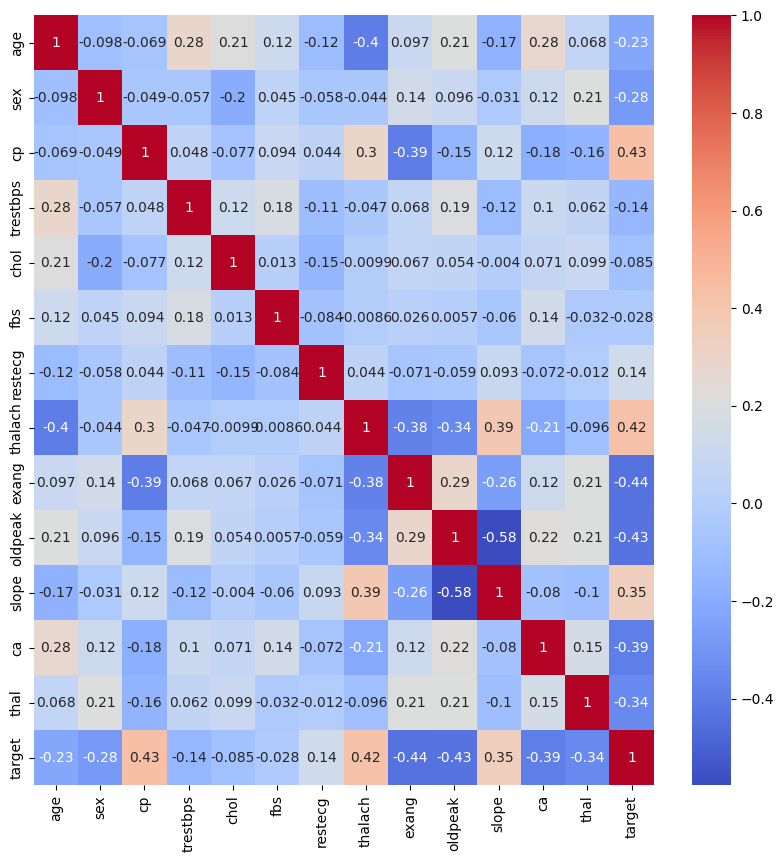

In [7]:
fig= plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [8]:
X=df.drop(["target"],axis=1)
y=df["target"]

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

In [10]:
X_train.shape ,X_test.shape, y_train.shape,y_test.shape

((181, 13), (122, 13), (181,), (122,))

In [11]:
SC=StandardScaler()
X_train=SC.fit_transform(X_train)
X_test=SC.transform(X_test)

In [12]:
Classifier=Sequential()
Classifier.add(Dense(units=8,activation='relu',input_dim=13,kernel_initializer="uniform"))
Classifier.add(Dense(units=14,activation='relu',kernel_initializer="uniform"))
Classifier.add(Dense(units=16,activation="relu",kernel_initializer="uniform"))
Classifier.add(Dense(units=20,activation="relu",kernel_initializer="uniform"))
Classifier.add(Dense(units=1,activation='sigmoid'))
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
Classifier.fit(X_train,y_train,batch_size=10,epochs=90)

Epoch 1/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5127 - loss: 0.6931
Epoch 2/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5155 - loss: 0.6928
Epoch 3/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5368 - loss: 0.6916
Epoch 4/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5976 - loss: 0.6865
Epoch 5/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5242 - loss: 0.6844
Epoch 6/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5551 - loss: 0.6636
Epoch 7/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5808 - loss: 0.6095
Epoch 8/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7998 - loss: 0.5454
Epoch 9/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8480 - loss: 0.4680
Epoch 10/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8853 - loss: 0.4169
Epoch 11/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9145 - loss: 0.3422
Epoch 12/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.873

In [14]:
Classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,519 (9.84 KB)

 Trainable params: 839 (3.28 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,680 (6.57 KB)

In [15]:
y_pred=Classifier.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [16]:
y_pred=(y_pred>0.5)


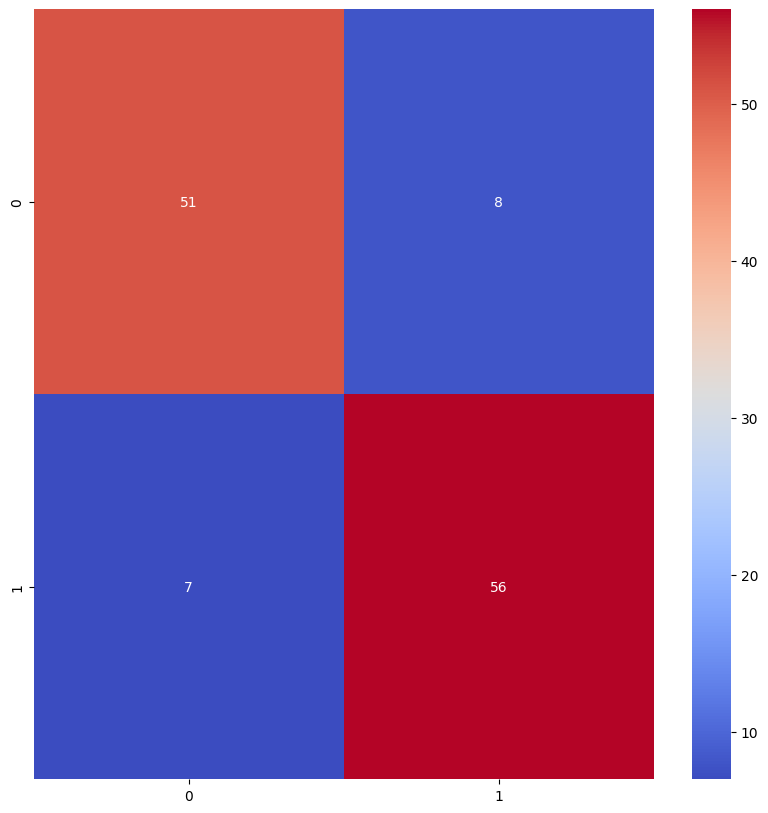

In [17]:
figure=plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm')
plt.show()

In [18]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        59
           1       0.88      0.89      0.88        63

    accuracy                           0.88       122
   macro avg       0.88      0.88      0.88       122
weighted avg       0.88      0.88      0.88       122



In [19]:
cm=confusion_matrix(y_test,y_pred)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy*100)

87.70491803278688
